In [1]:
import pandas as pd

file_path = '../report/Sokoban.csv'
sokoban_data = pd.read_csv(file_path)

sokoban_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   level                       10 non-null     int64  
 1   bfs_step                    10 non-null     int64  
 2   bfs_visited                 10 non-null     int64  
 3   bfs_time                    10 non-null     float64
 4   dfs_step                    10 non-null     int64  
 5   dfs_visited                 10 non-null     int64  
 6   dfs_time                    10 non-null     float64
 7   astar_step                  10 non-null     int64  
 8   astar_visited               10 non-null     int64  
 9   astar_time                  10 non-null     float64
 10  backtracking_step           9 non-null      float64
 11  backtracking_visited        9 non-null      float64
 12  backtracking_time           9 non-null      float64
 13  simulatedannealing_step     0 non-null

In [2]:
sokoban_data.isnull().sum()

level                          0
bfs_step                       0
bfs_visited                    0
bfs_time                       0
dfs_step                       0
dfs_visited                    0
dfs_time                       0
astar_step                     0
astar_visited                  0
astar_time                     0
backtracking_step              1
backtracking_visited           1
backtracking_time              1
simulatedannealing_step       10
simulatedannealing_visited    10
simulatedannealing_time       10
dtype: int64

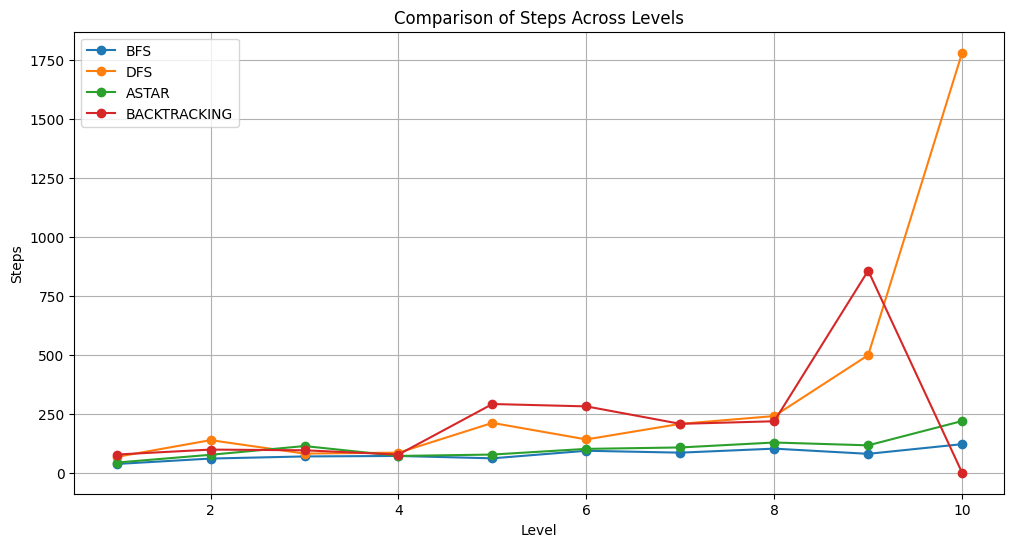

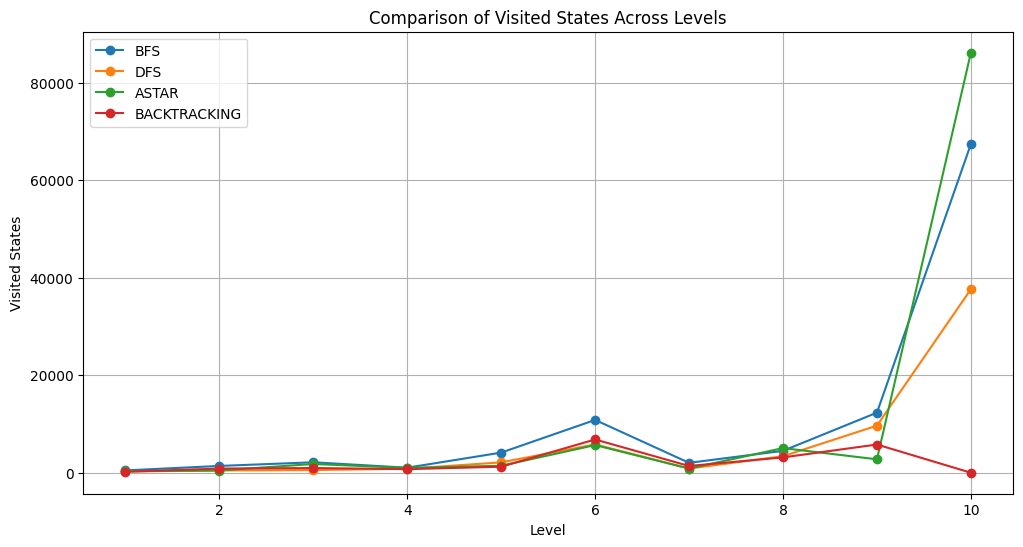

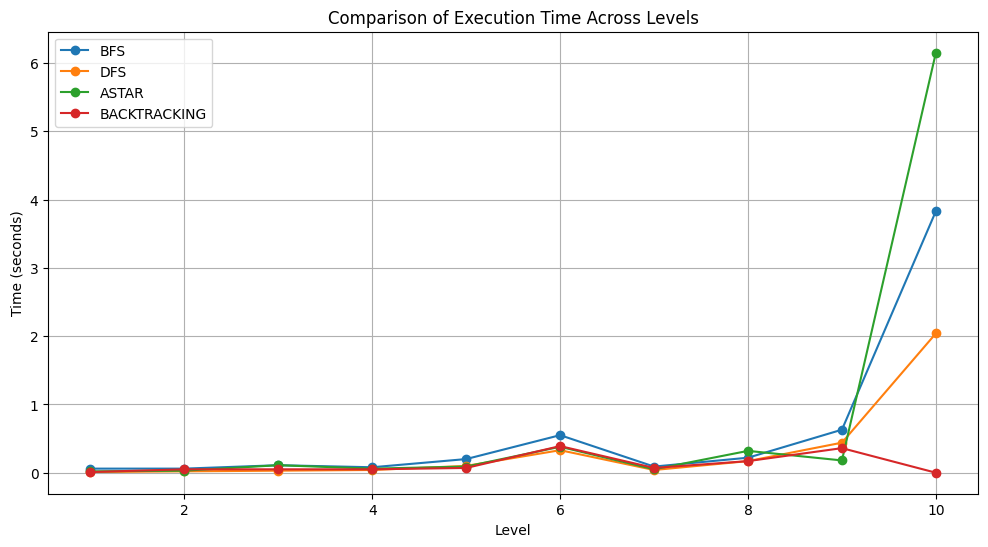

In [5]:
import matplotlib.pyplot as plt

cleaned_data = sokoban_data.drop(
    columns=["simulatedannealing_step", "simulatedannealing_visited", "simulatedannealing_time"]
)

cleaned_data.fillna(0, inplace=True)

levels = cleaned_data['level']

def plot_comparison(metric, title, ylabel):
    plt.figure(figsize=(12, 6))
    for algorithm in ["bfs", "dfs", "astar", "backtracking"]:
        plt.plot(levels, cleaned_data[f"{algorithm}_{metric}"], marker='o', label=algorithm.upper())
    plt.title(title)
    plt.xlabel("Level")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()


plot_comparison("step", "Comparison of Steps Across Levels", "Steps")
plot_comparison("visited", "Comparison of Visited States Across Levels", "Visited States")
plot_comparison("time", "Comparison of Execution Time Across Levels", "Time (seconds)")

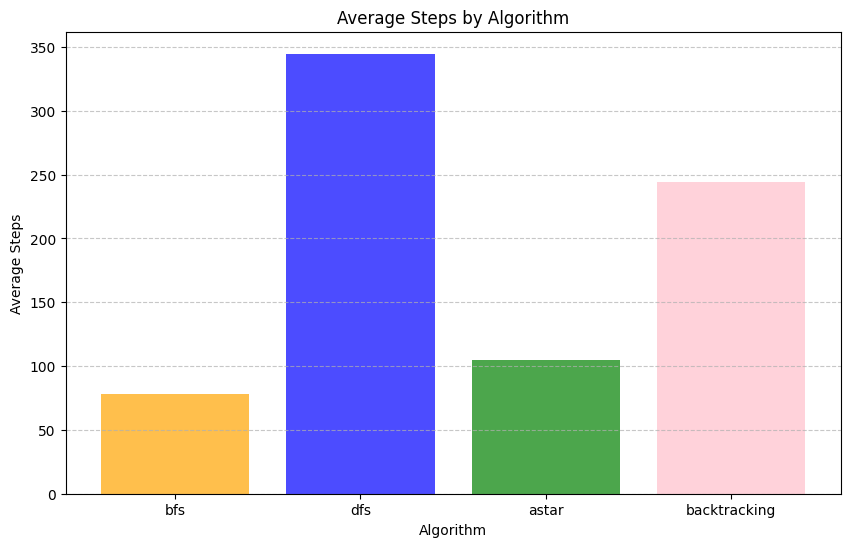

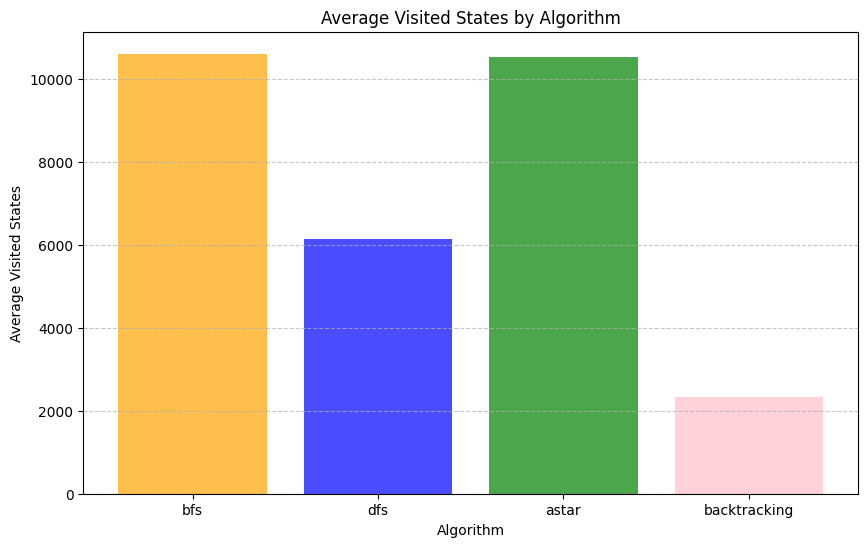

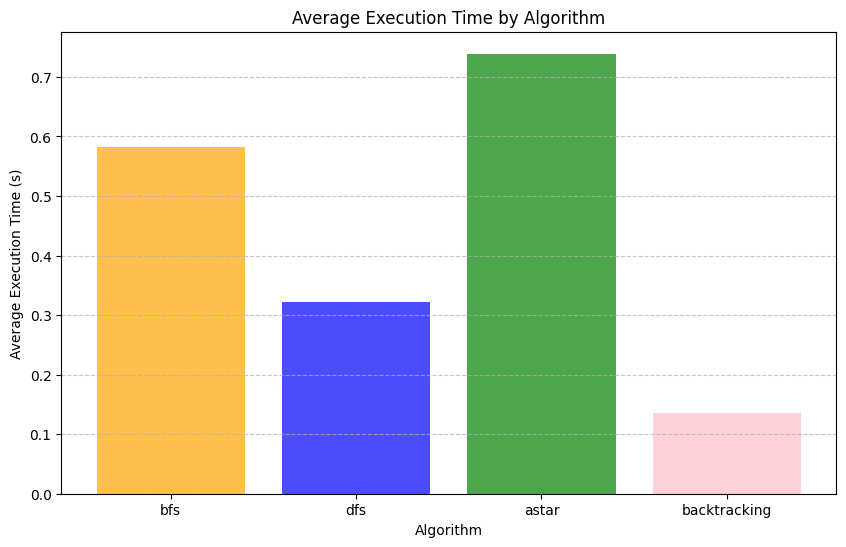

In [6]:
import numpy as np

data = sokoban_data.drop(
    columns=["simulatedannealing_step", "simulatedannealing_visited", "simulatedannealing_time"]
)

def plot_bar_comparison(metric, title, ylabel):
    algorithms = ["bfs", "dfs", "astar", "backtracking"]
    values = [data[f"{alg}_{metric}"].mean() for alg in algorithms]

    x_positions = np.arange(len(algorithms))

    plt.figure(figsize=(10, 6))
    plt.bar(x_positions, values, color=['orange', 'blue', 'green', 'pink'], alpha=0.7)
    plt.xticks(x_positions, algorithms)
    plt.title(title)
    plt.xlabel("Algorithm")
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


plot_bar_comparison("step", "Average Steps by Algorithm", "Average Steps")
plot_bar_comparison("visited", "Average Visited States by Algorithm", "Average Visited States")
plot_bar_comparison("time", "Average Execution Time by Algorithm", "Average Execution Time (s)")

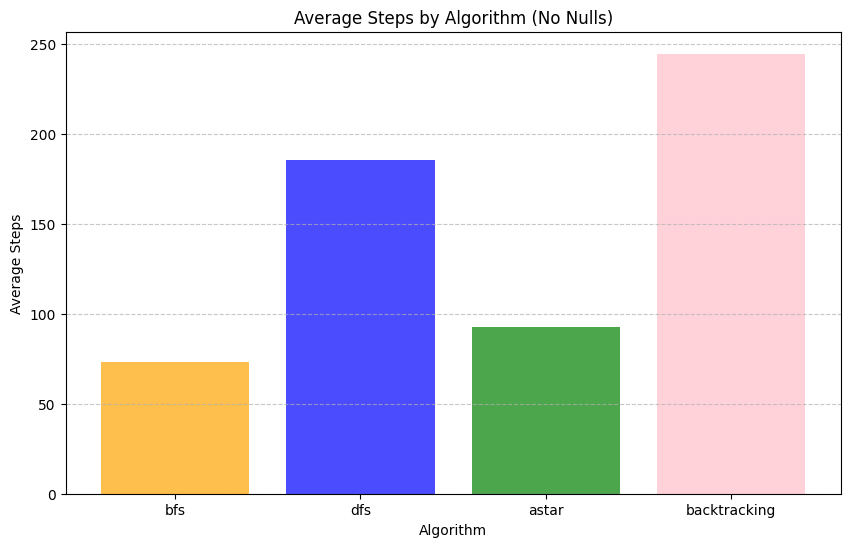

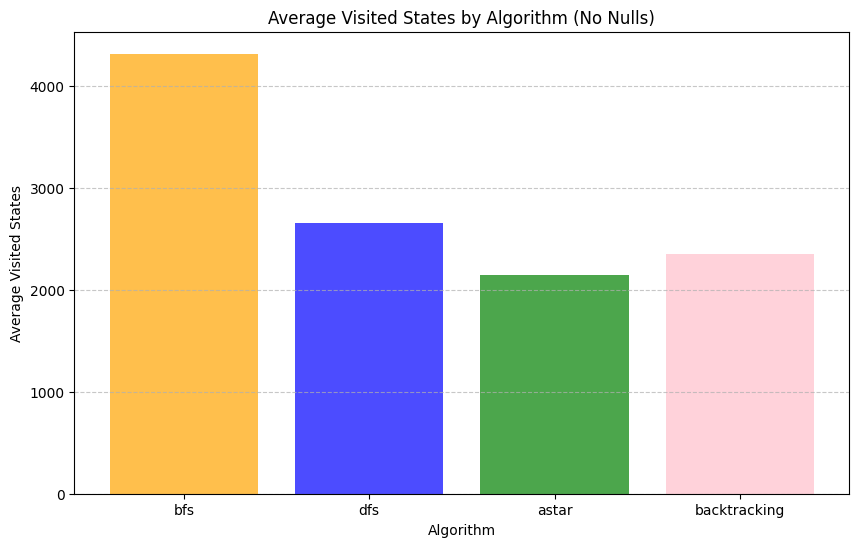

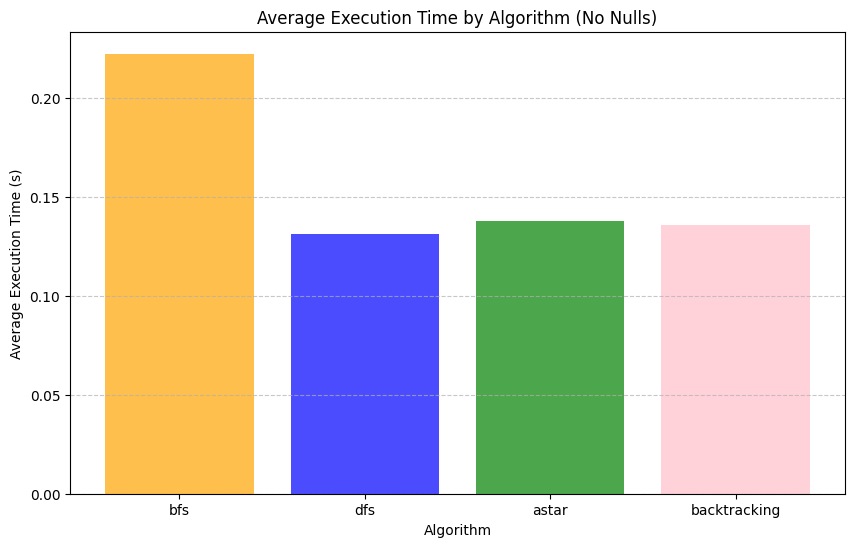

In [7]:
cleaned_data = sokoban_data.drop(
    columns=["simulatedannealing_step", "simulatedannealing_visited", "simulatedannealing_time"]
)

cleaned_data_no_null = cleaned_data.dropna()

def plot_bar_comparison_no_null(metric, title, ylabel):
    algorithms = ["bfs", "dfs", "astar", "backtracking"]
    values = [cleaned_data_no_null[f"{alg}_{metric}"].mean() for alg in algorithms]

    x_positions = np.arange(len(algorithms))

    plt.figure(figsize=(10, 6))
    plt.bar(x_positions, values, color=['orange', 'blue', 'green', 'pink'], alpha=0.7)
    plt.xticks(x_positions, algorithms)
    plt.title(title)
    plt.xlabel("Algorithm")
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


plot_bar_comparison_no_null("step", "Average Steps by Algorithm (No Nulls)", "Average Steps")
plot_bar_comparison_no_null("visited", "Average Visited States by Algorithm (No Nulls)", "Average Visited States")
plot_bar_comparison_no_null("time", "Average Execution Time by Algorithm (No Nulls)", "Average Execution Time (s)")